In [50]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [51]:
train.shape

(10886, 12)

In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [55]:
train['tempDate'] = train.datetime.apply(lambda x:x.split())
train['date'] = train['tempDate'].apply(lambda x: x[0])     
train['year'] = train['tempDate'].apply(lambda x: x[0].split('-')[0])
train['month'] = train['tempDate'].apply(lambda x: x[0].split('-')[1])
train['day'] = train['tempDate'].apply(lambda x: x[0].split('-')[2])
train['hour'] = train['tempDate'].apply(lambda x: x[1].split(':')[0])
train['minute'] = train['tempDate'].apply(lambda x: x[1].split(':')[1])
train['second'] = train['tempDate'].apply(lambda x: x[1].split(':')[2])
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])


train['tempDate'] = pd.to_datetime(train['datetime'])

train['dayofweek'] = train['tempDate'].dt.dayofweek
train['weekend'] = (train['dayofweek'] ==5) | (train['dayofweek'] == 6)

train = train.drop('tempDate', axis=1)

In [56]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,minute,second,weekday,dayofweek,weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2011-01-01,2011,01,01,00,00,00,Saturday,5,True
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,2011-01-01,2011,01,01,01,00,00,Saturday,5,True
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2011-01-01,2011,01,01,02,00,00,Saturday,5,True
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2011-01-01,2011,01,01,03,00,00,Saturday,5,True
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2011-01-01,2011,01,01,04,00,00,Saturday,5,True


<Axes: xlabel='humidity', ylabel='count'>

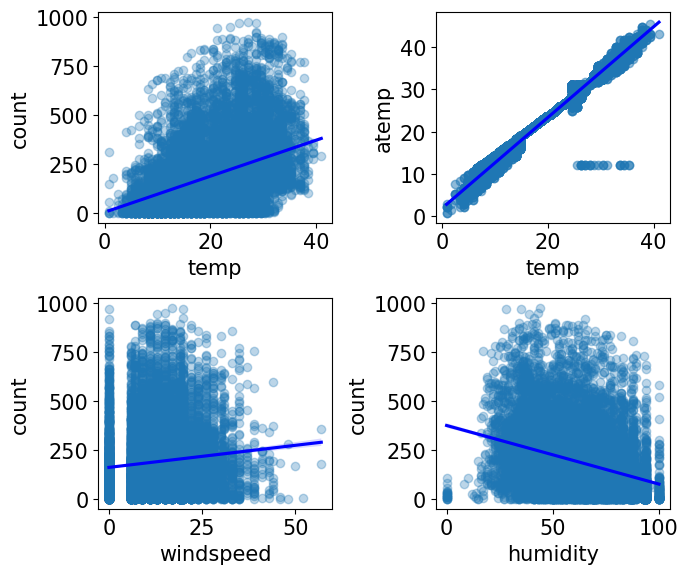

In [57]:
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x = 'temp', y = 'count', data = train, ax = axes[0,0], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x = 'temp', y = 'atemp', data = train, ax = axes[0,1], scatter_kws= {'alpha': 0.5}, line_kws={'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = axes[1,0], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x = 'humidity', y = 'count', data = train, ax = axes[1,1], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})

<Axes: >

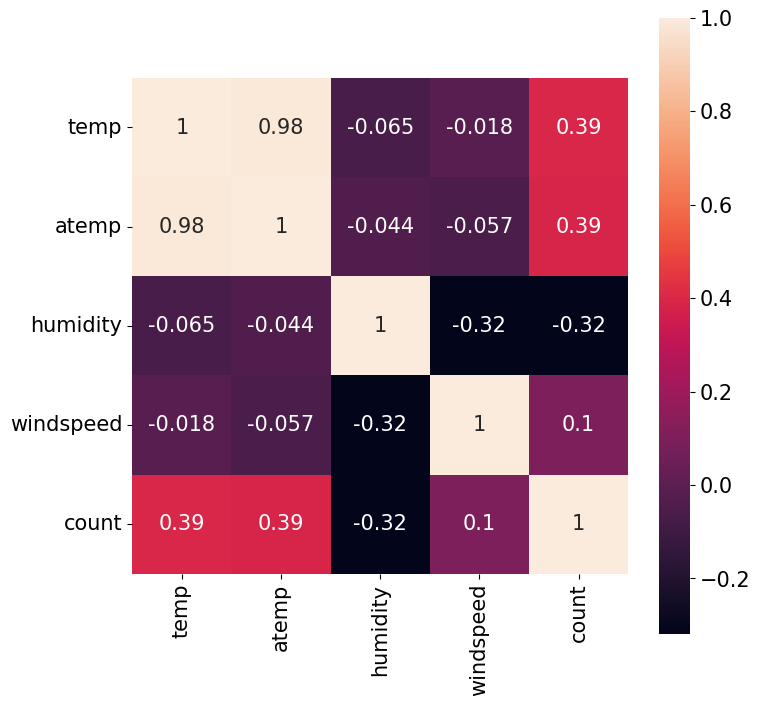

In [58]:
fig = plt.figure(figsize=[8,8])
corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True, square=True, cbar=True)

<Axes: xlabel='hour', ylabel='count'>

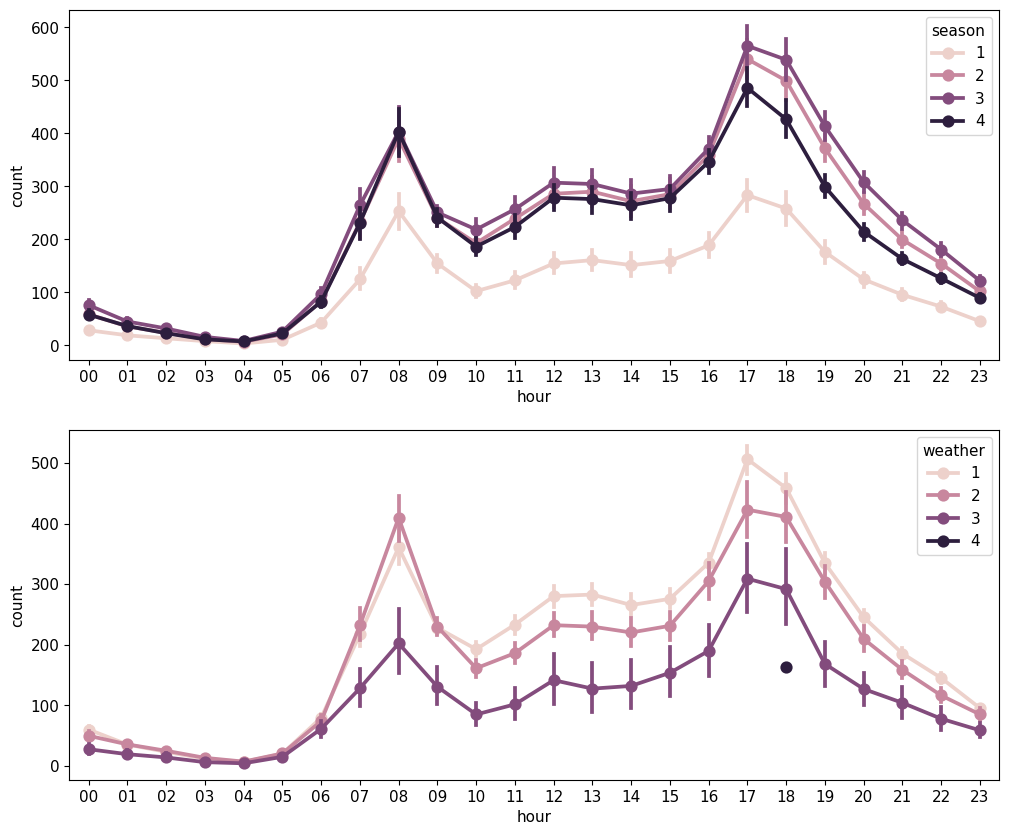

In [59]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=2)
figure.set_size_inches(12,10)

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[1])

<Axes: xlabel='hour', ylabel='casual'>

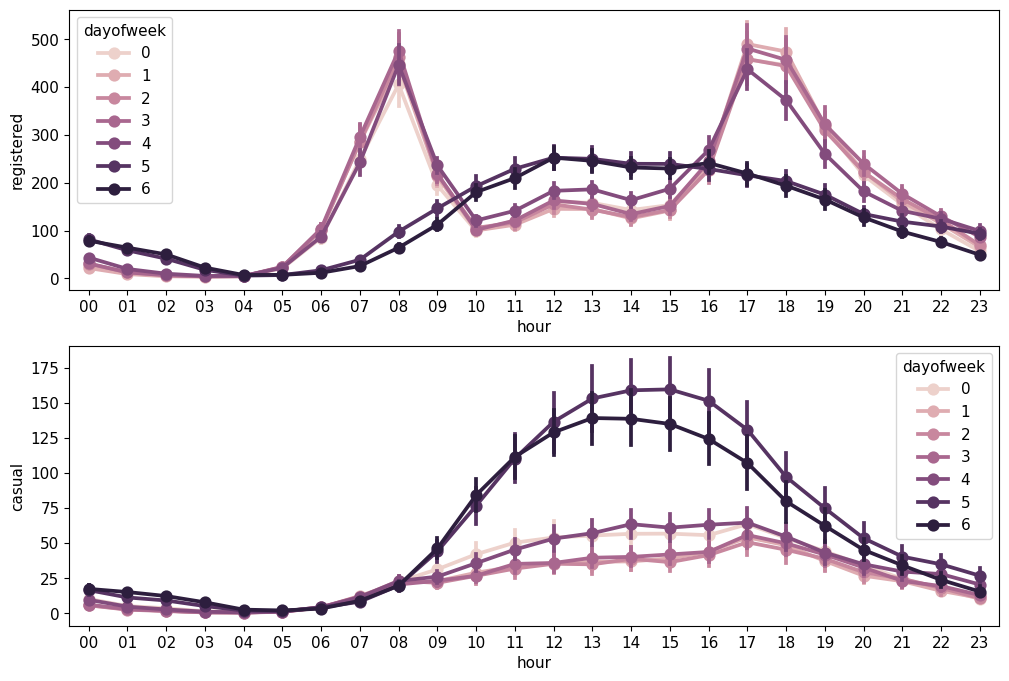

In [60]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=2)
figure.set_size_inches(12,8)

sns.pointplot(x = 'hour', y = 'registered', data = train, hue = 'dayofweek', ax = axes[0])
sns.pointplot(x = 'hour', y = 'casual', data = train, hue = 'dayofweek', ax = axes[1])

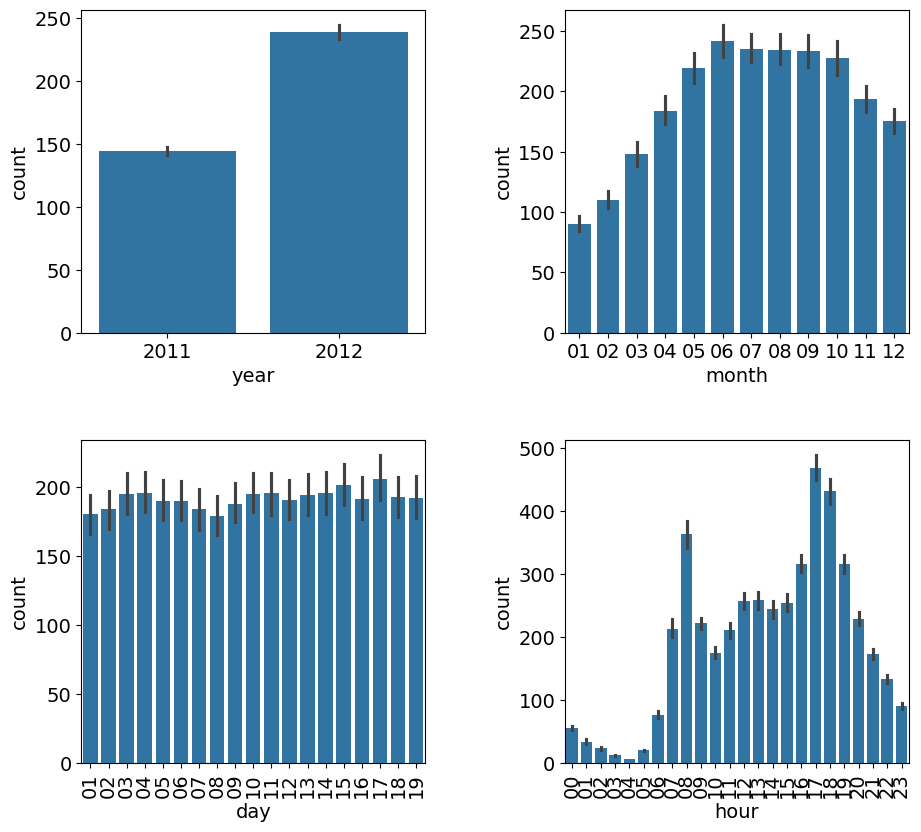

In [61]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=5)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

/var/folders/5n/_yzz26ms5l5b0dhwrfs_zrw40000gn/T/ipykernel_9361/2811709529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"])


<Axes: xlabel='count', ylabel='Density'>

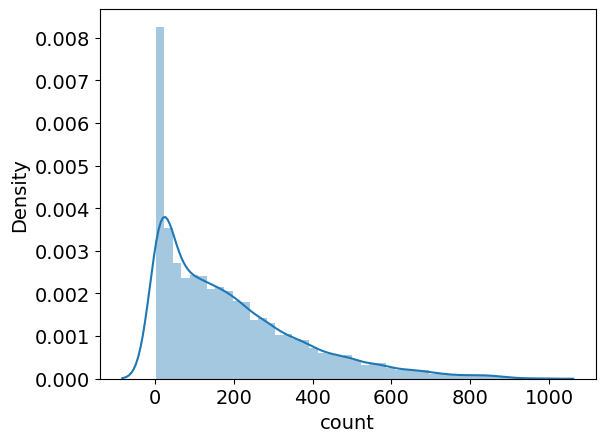

In [62]:
sns.distplot(train["count"])